# Introducing Team

Zahra Ataei mirik: Master's in socio-economic statistics from Ferdowsi University of Mashhad                                     
Nasrin Talkhi: Phd student in Biostatistics at Shahid Beheshti University of Medical Sciences                                   

# Part 1
The file A_Conversation_with_Kanti_Mardia.pdf contains a conversation with him published in the journal of Statistical Science in the year 2002. Based on this paper, please:                                                                                    

a) Determine the number of times the term 'Omar Khayyam' appears in the paper.

In [11]:
#!pip install pymupdf 
#!pip install fitz

In [1]:
## Read PDF file 
import fitz 
doc = fitz.open('A_Conversation_with_Kanti_Mardia.pdf') 

## Extract the text form PDF
text = "" 
for page in doc: 
   text+=page.get_text() 
print(text) 

Statistical Science
2002, Vol. 17, No. 1, 113–148
A Conversation with Kanti Mardia
Nitis Mukhopadhyay
Abstract.
Kantilal Vardichand Mardia was born on April 3, 1935, in Sirohi,
Rajasthan, India. He earned his B.Sc. degree in mathematics from Ismail
Yusuf College–University of Bombay, in 1955, M.Sc. degrees in statistics
and in pure mathematics from University of Bombay in 1957 and University
of Poona in 1961, respectively, and Ph.D. degrees in statistics from the
University of Rajasthan and the University of Newcastle, respectively, in
1965 and 1967. For signiﬁcant contributions in statistics, he was awarded
a D.Sc. degree from the University of Newcastle in 1973. He started his
career as an Assistant Lecturer in the Institute of Science, Bombay and
went to Newcastle as a Commonwealth Scholar. After receiving the Ph.D.
degree from Newcastle, he joined the University of Hull as a lecturer
in statistics in 1967, later becoming a reader in statistics in 1971. He
was appointed a Chair Prof

In [2]:
## Handle Regular expression operations (Normalization Phase)
import re
text = re.sub(r"[\d#]", "", text)
text = re.sub(r"[^\w\s]", '', text)
text = re.sub('\n', ' ', text)
text =  re.sub(r"\+", "", text)
text = re.sub(r"-", "", text)
text= re.sub(r"/", " ", text)
text= re.sub(r"@", " ", text)
text= re.sub(r"_", " ", text)
text=  re.sub(r"\\", " ", text)
text= re.sub(r"=", " ", text)
text= re.sub(r":", " ", text)
text= re.sub(r"\?", " ? ", text)
text= re.sub(r"!", " ! ", text)
text= re.sub(r"&", " ", text)
text= re.sub(r"\|", " ", text)
text= re.sub(r";", " ", text)
text= re.sub(r"\(", " ", text)
text= re.sub(r"\)", " ", text)

#print(text)

In [4]:
## NLTK : Natural Language Toolkit is a Python package for natural language processing
import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import MWETokenizer
import collections

## Multi-word expression tokenizer (MWETokenizer)
mwe = MWETokenizer([('Omar', 'Khayyam')], separator='_')
mwe
#words = word_tokenize(text)

## Word tokenize
words_new = mwe.tokenize(word_tokenize(text))
words_new
#count_Omar_Khayyam = words_new.count("Omar_Khayyam")
#count_Omar_Khayyam

print("The number of repetitions of the word Omar Khayyam is : {}".format(words_new.count("Omar_Khayyam")))

The number of repetitions of the word Omar Khayyam is : 12


In [5]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import collections
#nltk.download('stopwords')

wordlist = []
ps = PorterStemmer()
words = word_tokenize(text)
stop_words = set(stopwords.words('english'))

for w in words:
    if w not in stop_words:
        wordlist=ps.stem(w)
        
    
dicwordcount = {}
for word in words:
    if word not in dicwordcount.keys():
        dicwordcount[word] = 1
    else:
        dicwordcount[word] +=1
        

# Part 2
b) Create a visually appealing word cloud displaying the most frequently used words in the paper (for instance, this can be done using the tomb of Omar Khayyam as the template of the word cloud).

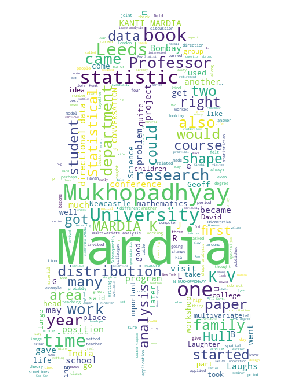

In [5]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from PIL import Image

## Load background image
mask = np.array(Image.open("khayyam-1-1.jpg"))

#stop_words = set(stopwords.words('english'))

## Visualize most commen words using wordcloud
wc = WordCloud(stopwords = stop_words,
			mask = mask, 
			background_color = "white",
			max_words = 2000,
			max_font_size = 500,
			random_state = 42, 
			width = mask.shape[1],
			height = mask.shape[0])

# Finally generate the wordcloud of the given text
wc.generate(text) 
plt.imshow(wc, interpolation = "None")

# Off the x and y axis
plt.axis('off')

# Now show the output cloud
plt.show()


In [34]:
## Print and save the most common words in a csv file
#print(dicwordcount)
n_print = 500
#int(input("How many most common words to print: "))
print("\nOK. The {} most common words can be seen in the csv file \n".format(n_print))
word_counter = collections.Counter(dicwordcount)
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['word', 'Count'])
df.to_csv('df.csv', index=False)


OK. The 500 most common words can be seen in the csv file 

